**Theoretical Questions**


1. What is Logistic Regression, and how does it differ from Linear Regression?
- Logistic Regression is a supervised learning algorithm used for classification tasks, predicting the probability that an input belongs to a particular class. Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts discrete outcomes (e.g., yes/no, 0/1) using a probability score mapped through the sigmoid function.



2. What is the mathematical equation of Logistic Regression?
The equation is:


P(y=1∣X)=σ(w
T
 X+b)=
1+e
−(w
T
 X+b)


where
σ
σ is the sigmoid function,
w
w is the weight vector,
X
X is the feature vector, and
b
b is the bias term.

3. Why do we use the Sigmoid function in Logistic Regression?
- The sigmoid function maps any real-valued number into the (0, 1) interval, making it suitable for modeling probabilities in binary classification.

4. What is the cost function of Logistic Regression?
- Logistic Regression uses the binary cross-entropy (log loss) as its cost function:
J(w)=−
m
1
  
i=1
∑
m
 [y
(i)
 log(p
(i)
 )+(1−y
(i)
 )log(1−p
(i)
 )]
where
p
(
i
)
p
(i)
  is the predicted probability for instance
i
i.

5. What is Regularization in Logistic Regression? Why is it needed?
- Regularization adds a penalty to the loss function to prevent overfitting by discouraging overly complex models (large coefficients).

6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

Lasso (L1): Adds
λ
∑
∣
w
j
∣
λ∑∣w
j
 ∣ penalty; can shrink coefficients to zero (feature selection).

Ridge (L2): Adds
λ
∑
w
j
2
λ∑w
j
2
  penalty; shrinks coefficients but doesn’t set them to zero.

Elastic Net: Combines L1 and L2 penalties.

7. When should we use Elastic Net instead of Lasso or Ridge?
- Elastic Net is preferred when there are multiple correlated features or when both feature selection and coefficient shrinkage are desired.

8. What is the impact of the regularization parameter (
λ
λ) in Logistic Regression?
- A higher
λ
λ increases regularization strength, shrinking coefficients more and reducing overfitting, but too high can underfit.

9. What are the key assumptions of Logistic Regression?

- Linearity between independent variables and log-odds.

- Independence of errors.

- No multicollinearity among predictors.

- Large sample size.



10. What are some alternatives to Logistic Regression for classification tasks?

- Decision Trees

- Random Forests

- Support Vector Machines

- Naive Bayes

- Neural Networks

- k-Nearest Neighbors

11. What are Classification Evaluation Metrics?
- Metrics include accuracy, precision, recall, F1-score, ROC-AUC, confusion matrix, Cohen’s Kappa, MCC, etc.

12. How does class imbalance affect Logistic Regression?
- Class imbalance can bias the model toward the majority class, reducing performance on minority classes.

13. What is Hyperparameter Tuning in Logistic Regression?
- It involves adjusting parameters like regularization strength (C), penalty type, and solver to optimize model performance.

14. What are different solvers in Logistic Regression? Which one should be used?
- Common solvers:

- ‘liblinear’: good for small datasets, supports L1/L2.

- ‘lbfgs’: efficient for multiclass, L2.

- ‘saga’: supports L1, L2, and Elastic Net, scalable.

-  ‘newton-cg’: L2, multiclass.
Choose based on dataset size and regularization.



15. How is Logistic Regression extended for multiclass classification?
- By using One-vs-Rest (OvR) or multinomial (Softmax) approaches.

16. What are the advantages and disadvantages of Logistic Regression?
- Advantages: Simple, interpretable, efficient, probabilistic outputs.
- Disadvantages: Assumes linearity, sensitive to outliers, struggles with complex relationships.

17. What are some use cases of Logistic Regression?

- Spam detection

- Credit scoring

- Disease prediction

- Customer churn prediction

18. What is the difference between Softmax Regression and Logistic Regression?
- Softmax Regression (multinomial logistic regression) generalizes logistic regression to multiclass problems, using the softmax function to model probabilities across multiple classes.

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
- OvR trains one classifier per class; Softmax trains a single model for all classes. Use Softmax for mutually exclusive classes and OvR for non-exclusive or imbalanced classes.

20. How do we interpret coefficients in Logistic Regression?
- Each coefficient represents the log-odds change in the outcome for a one-unit increase in the predictor, holding others constant.

Practical Questions
**bold text**

In [2]:
# 1. Load dataset, split, train Logistic Regression, print accuracy:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris # Import a dataset to demonstrate

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
print('Accuracy:', accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9666666666666667


In [3]:
# 2. L1 Regularization (Lasso):
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
print('Accuracy:', accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.9666666666666667


In [4]:
# 3. L2 Regularization (Ridge), print accuracy and coefficients:
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
print('Accuracy:', accuracy_score(y_test, model.predict(X_test)))
print('Coefficients:', model.coef_)



Accuracy: 0.9666666666666667
Coefficients: [[-0.44788325  0.854105   -2.34351588 -1.05110192]
 [ 0.50039676 -0.30761558 -0.15631188 -0.88864032]
 [-0.05251351 -0.54648942  2.49982776  1.93974223]]


In [5]:
# 4. Elastic Net Regularization:
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [6]:
#  5. Multiclass with OvR:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [7]:
# 6. GridSearchCV for hyperparameters:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(LogisticRegression(), params)
grid.fit(X_train, y_train)
print('Best Params:', grid.best_params_)
print('Best Accuracy:', grid.best_score_)




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.9666666666666666


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [8]:
# 7. Stratified K-Fold Cross-Validation:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(LogisticRegression(), X, y, cv=cv)
print('Average Accuracy:', scores.mean())



Average Accuracy: 0.9733333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 8. Load from CSV, apply Logistic Regression, evaluate accuracy:
import pandas as pd
df = pd.read_csv('dataset.csv')
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
# 9. RandomizedSearchCV for hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
rand = RandomizedSearchCV(LogisticRegression(), params, n_iter=5)
rand.fit(X_train, y_train)
print('Best Params:', rand.best_params_)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Params: {'solver': 'saga', 'penalty': 'l1', 'C': 1}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [12]:
# 10. One-vs-One (OvO) Multiclass:
from sklearn.multiclass import OneVsOneClassifier
model = OneVsOneClassifier(LogisticRegression())
model.fit(X_train, y_train)
print('Accuracy:', accuracy_score(y_test, model.predict(X_test)))



Accuracy: 0.9666666666666667


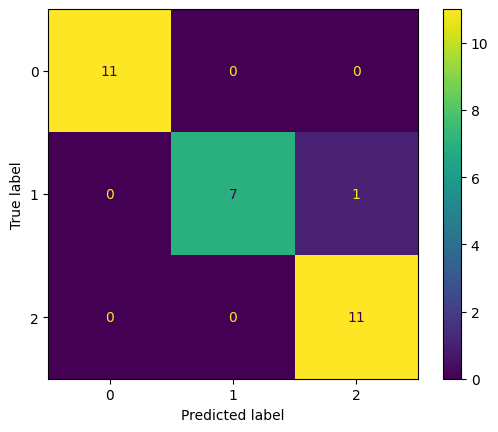

In [13]:
# 11. Visualize confusion matrix:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [14]:
# 12. Precision, Recall, F1-Score:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [15]:
# 13. Handle class imbalance with class weights:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced')

In [ ]:
# 14. Titanic dataset, handle missing values:

df.fillna(df.mean(), inplace=True)


In [21]:
# 15. Feature scaling (Standardization):
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# 16. ROC-AUC score:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:,1]
print('ROC-AUC:', roc_auc_score(y_test, y_pred_proba))


In [23]:
# 17. Custom learning rate (C=0.5):
model = LogisticRegression(C=0.5)
model.fit(X_train, y_train)



LogisticRegression(C=0.5)

In [24]:
# 18. Identify important features:
import numpy as np
feature_importance = np.abs(model.coef_[0])
print('Important features:', feature_importance)


Important features: [0.41490358 0.64254054 1.9127008  0.83030621]


In [25]:
# 19. Cohen's Kappa Score:
from sklearn.metrics import cohen_kappa_score
print('Cohen\'s Kappa:', cohen_kappa_score(y_test, model.predict(X_test)))



Cohen's Kappa: 0.898989898989899


In [ ]:
# 20. Precision-Recall Curve:

from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)


In [27]:
# 21. Compare different solvers:
for solver in ['liblinear', 'saga', 'lbfgs']:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    print(f'{solver} Accuracy:', accuracy_score(y_test, model.predict(X_test)))


liblinear Accuracy: 0.9666666666666667
saga Accuracy: 0.9666666666666667
lbfgs Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [28]:
# 22. Matthews Correlation Coefficient (MCC):
from sklearn.metrics import matthews_corrcoef
print('MCC:', matthews_corrcoef(y_test, model.predict(X_test)))



MCC: 0.9508693106633108


In [30]:
# 23. Compare raw vs standardized data:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)
print("Accuracy on raw data:", acc_raw)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy on standardized data:", acc_scaled)



Accuracy on raw data: 0.956140350877193
Accuracy on standardized data: 0.9736842105263158


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# 24. Find optimal C using cross-validation:
from sklearn.model_selection import cross_val_score
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(C=c)
    scores = cross_val_score(model, X, y, cv=5)
    print(f'C={c}, Accuracy={scores.mean()}')



C=0.01, Accuracy=0.86
C=0.1, Accuracy=0.9466666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C=1, Accuracy=0.9733333333333334
C=10, Accuracy=0.9800000000000001


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# 25. Save and load model using joblib:
import joblib
joblib.dump(model, 'logreg_model.pkl')
model_loaded = joblib.load('logreg_model.pkl')
predictions = model_loaded.predict(X_test)
